# Data Exploration

In [47]:
import datetime
import os
import json

### Data Format Declaration

The data will be stored in JSON format where every entry contains data on a single workout. JSON is chosen to support different types of workout. For example I have spent most of 2019 to 2020 doing the Stronglifts 5x5 workout, and have just recently switched over to Jim Wendler's 5x3x1. These are two completely differently formatted workouts and an unstructed data store such as JSON will allow me to keep track of all my workouts regardless of the structure.

The data will be stored as a dictionary where the key represents the date of the workout, and the value is the information on that day's workout

The key of the data will be stored as such:  
0) date (str): A string of the days date, in DD-MM-YYYY format, e.g. 21-04-1997  

5x3x1 Key Fields:  
1) program (str): A string describing the particular workout program, e.g. '5x3x1'  
2) type (str): A string of the particular lift for the workout. Squat, Bench Press, Deadlift, or Overhead Press  
3) sets (list of dict): A list of all the sets, each set is a dictionary with 'reps' and 'weight'

### Creating the JSON

Creating the first workout

In [3]:
workout = {
    'program': '5x3x1',
    'type': 'Squat',
    'sets': [
        {'reps': 5, 'weight': 185},
        {'reps': 5, 'weight': 215},
        {'reps': 10, 'weight': 240}
    ]
}

Adding the workout to the JSON then saving to the repo

In [5]:
lifts = {}
lifts['25-05-2020'] = workout

In [6]:
with open('lift_data.json', 'w') as outfile:
    json.dump(lifts, outfile)

# Adding Workouts to the Lift Data

(temporary until the dashboard is working)

In [10]:
with open('lift_data.json') as json_file:
    data = json.load(json_file)

In [28]:
data

{'25-05-2020': {'program': '5x3x1',
  'type': 'Squat',
  'sets': [{'reps': 5, 'weight': 185},
   {'reps': 5, 'weight': 215},
   {'reps': 10, 'weight': 240}]},
 '27-05-2020': {'program': '5x3x1',
  'type': 'Bench Press',
  'sets': [{'reps': 5, 'weight': 100},
   {'reps': 5, 'weight': 115},
   {'reps': 11, 'weight': 130}]},
 '29-05-2020': {'program': '5x3x1',
  'type': 'Deadlift',
  'sets': [{'reps': 5, 'weight': 195},
   {'reps': 5, 'weight': 225},
   {'reps': 12, 'weight': 255}]},
 '30-05-2020': {'program': '5x3x1',
  'type': 'Overhead Press',
  'sets': [{'reps': 5, 'weight': 65},
   {'reps': 5, 'weight': 75},
   {'reps': 13, 'weight': 85}]},
 '06-06-2020': {'program': '5x3x1',
  'type': 'Overhead Press',
  'sets': [{'reps': 5, 'weight': 65},
   {'reps': 5, 'weight': 75},
   {'reps': 12, 'weight': 85}]},
 '10-06-2020': {'program': '5x3x1',
  'type': 'Bench Press',
  'sets': [{'reps': 5, 'weight': 100},
   {'reps': 5, 'weight': 115},
   {'reps': 10, 'weight': 130}]},
 '08-06-2020': {'pr

In [29]:
workout = {
    'program': '5x3x1',
    'type': 'Squat',
    'sets': [
        {'reps': 5, 'weight': 225},
        {'reps': 3, 'weight': 270},
        {'reps': 1, 'weight': 315}
    ]
}

In [30]:
data['22-06-2020'] = workout

In [32]:
with open('lift_data.json', 'w') as outfile:
    json.dump(data, outfile)

# Reading in the Lift data and exploring

In [41]:
with open('lift_data.json') as json_file:
    data = json.load(json_file)

In [42]:
data.keys()

dict_keys(['25-05-2020', '27-05-2020', '29-05-2020', '30-05-2020', '06-06-2020', '10-06-2020', '08-06-2020', '05-06-2020', '01-06-2020', '03-05-2020', '01-07-2020', '29-06-2020', '27-06-2020', '26-06-2020', '24-06-2020', '22-06-2020'])

In [43]:
data['25-05-2020']

{'program': '5x3x1',
 'type': 'Squat',
 'sets': [{'reps': 5, 'weight': 185},
  {'reps': 5, 'weight': 215},
  {'reps': 10, 'weight': 240}]}

Adding a way of converting the '5x3x1' programs into a dataframe to work with

In [61]:
# Iterating through all the workouts and adding them to the dataframe if the program was 5x3x1
import collections
df = collections.defaultdict(list)

for date, workout in data.items():
    # If the program is not 5x3x1 then just skip it
    if workout['program'] != '5x3x1':
        continue
    # Adding the date
    date = list(map(int, date.split('-')))
    df['date'].append(datetime.date(date[2], date[1], date[0]))
    # Adding the exercise type
    df['type'].append(workout['type'])
    # Adding the sets and reps and weights
    for i, set in enumerate(workout['sets']):
        df['set_{}_reps'.format(i + 1)].append(set['reps'])
        df['set_{}_weight'.format(i + 1)].append(set['weight'])

In [78]:
# Converting the data into a pandas dataframe
import pandas as pd
df = pd.DataFrame(df).sort_values('date')
df.head(5)

,date,type,set_1_reps,set_1_weight,set_2_reps,set_2_weight,set_3_reps,set_3_weight
9,2020-05-03,Bench Press,5,100,5,115,11,130
0,2020-05-25,Squat,5,185,5,215,10,240
1,2020-05-27,Bench Press,5,100,5,115,11,130
2,2020-05-29,Deadlift,5,195,5,225,12,255
3,2020-05-30,Overhead Press,5,65,5,75,13,85


In [76]:
df[['set_1_reps', 'set_2_reps', 'set_3_reps']].stack().head(12)

9  set_1_reps     5
   set_2_reps     5
   set_3_reps    11
0  set_1_reps     5
   set_2_reps     5
   set_3_reps    10
1  set_1_reps     5
   set_2_reps     5
   set_3_reps    11
2  set_1_reps     5
   set_2_reps     5
   set_3_reps    12
dtype: int64

In [77]:
df[['set_1_weight', 'set_2_weight', 'set_3_weight']].stack().head(12)

9  set_1_weight    100
   set_2_weight    115
   set_3_weight    130
0  set_1_weight    185
   set_2_weight    215
   set_3_weight    240
1  set_1_weight    100
   set_2_weight    115
   set_3_weight    130
2  set_1_weight    195
   set_2_weight    225
   set_3_weight    255
dtype: int64

In [65]:
# Visualizing the reps and weights and color grouping by exercise type
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

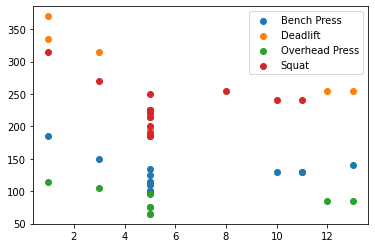

In [79]:
fig, ax = plt.subplots()

for exercise, workout in df.groupby('type'):
    x = workout[['set_1_reps', 'set_2_reps', 'set_3_reps']].stack().values
    y = workout[['set_1_weight', 'set_2_weight', 'set_3_weight']].stack().values
    ax.scatter(x, y, label=exercise)
    

ax.legend()

plt.show()